# Interfaceing HDF5 files following the Standard Name Convention

Let's remember, that standard names are set to identify certain datasets in the HDF5 file. Those datasets have a special meaning to the user and are likely to be frequently used in the analysis of the data.

For this purpose a high-level interface `HDF5StandardNameInterface` is written, which facilitates the work with such HDF5 data.
It scans the HDF5 file for all standard names and creates a class property for each

In [1]:
import h5rdmtoolbox as h5tbx

from h5rdmtoolbox.conventions.standard_names import HDF5StandardNameInterface

import numpy as np

cv = h5tbx.conventions.from_zenodo(doi=8276817)
cv.use()

In [2]:
with h5tbx.File(contact=h5tbx.__author_orcid__) as h5:
    h5.create_dataset('x', data=[-4, 1, 3, 5, 10],
                      standard_name='x_coordinate',
                      units='m', make_scale=True)
    h5.create_dataset('y', data=[10, 11, 13],
                      standard_name='y_coordinate',
                      units='m', make_scale=True)
    h5.create_dataset('u', np.random.rand(3, 5),
                      standard_name='x_velocity',
                      units='m/s',
                      attach_scales=('y', 'x'))
    h5.create_dataset('v', np.random.rand(3, 5),
                      standard_name='y_velocity',
                      units='m/s',
                      attach_scales=('y', 'x'))
    h5.create_dataset('dudx', np.random.rand(3, 5),
                      standard_name='derivative_of_x_velocity_wrt_x_coordinate',
                      units='1/s')

In [3]:
h5sni = HDF5StandardNameInterface(h5.hdf_filename)
h5sni.standard_names

{'x_coordinate': '/',
 'y_coordinate': '/',
 'derivative_of_x_velocity_wrt_x_coordinate': '/',
 'x_velocity': '/',
 'y_velocity': '/'}

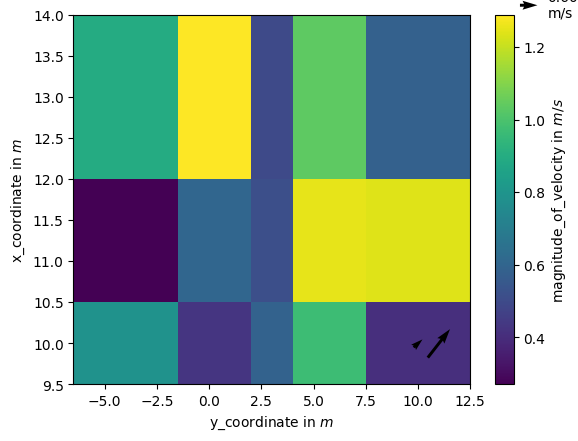

In [4]:
h5sni.velocity.plot()
h5sni.velocity.plot.quiver()